## Solutions to Exercises: Session 5¶

Again, we will work with the Titanic Dataframe. So, make sure to load the data in a first step (and don't forget to load the pandas and numpy modules as well). I will post solutions shortly after expiration of the deadline.

1. Like in the previous exercises, create a variable called 'upper_class' that takes the value 1 if a passenger travelled 1st class and 0 otherwise. Consider the relationship between 'upper_class' and 'Survived'. Why may the two be related? Compare survival chances among those who booked upper class and those who booked lower class.
2. How many passengers who carried the name 'Charles' were on the Titanic? What was their average age? How many of them survived? You will need to google a bit to answer this question.
3. Consider the variable 'Embarked', which denotes the port of embarcation. Compute how many passengers embarked at each port. Then visualize the distribution of passengers across the ports with the help of a distribution plot.
4. Consider the relationship between 'Pclass' and 'Fare'. What is the average fare for each 'Pclass'? What is the standard deviation within each 'Pclass'? Visualize the relationship between 'Pclass' and 'Fare', using different category plots.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_titanic = pd.read_csv('../python_basics_johanna/data/titanic.csv')

1. Like in the previous exercises, create a variable called 'upper_class' that takes the value 1 if a passenger travelled 1st class and 0 otherwise. Consider the relationship between 'upper_class' and 'Survived'. Why may the two be related? Compare survival chances among those who booked upper class and those who booked lower class.

In [21]:
# create 'upper_class'
df_titanic['upper_class'] = None
df_titanic.loc[df_titanic['Pclass'] == 1, 'upper_class'] = 1
df_titanic.loc[df_titanic['Pclass'] != 1, 'upper_class'] = 0

Passengers who booked upper class might have received preferential treatment w. r. t. lifeboats etc.

In [22]:
df_titanic.groupby('upper_class')['Survived'].mean()

upper_class
0    0.305185
1    0.629630
Name: Survived, dtype: float64

Indeed, survival chances among 'upper class' passengers were higher (approx. 60%) than among 'lower class' passengers (approx. 30%).

2. How many passengers who carried the name 'Charles' were on the Titanic? What was their average age? How many of them survived? You will need to google a bit to answer this question.

In [23]:
df_charles = df_titanic.loc[df_titanic['Name'].str.contains('Charles')]
print('Num. passengers who carried name "Charles": ' + str(len(df_charles)))

Num. passengers who carried name "Charles": 24


In [24]:
df_charles['Age'].mean()
print('Average age of passengers who carried name "Charles": ', df_charles['Age'].mean())

Average age of passengers who carried name "Charles":  33.225


In [25]:
len(df_charles.loc[df_charles['Survived'] == 1])
print('Number of passengers who carried name "Charles" and survived: ', len(df_charles.loc[df_charles['Survived'] == 1]))

Number of passengers who carried name "Charles" and survived:  7


3. Consider the variable 'Embarked', which denotes the port of embarcation. Compute how many passengers embarked at each port. Then visualize the distribution of passengers across the ports with the help of a distribution plot.

In [27]:
df_titanic.groupby('Embarked')['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

(array([644.,   0.,   0., 168.,   0.,   0.,  77.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

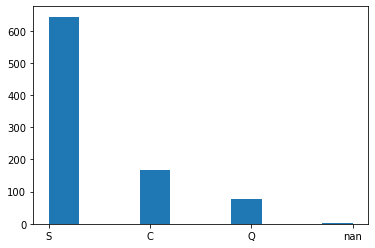

In [28]:
plt.hist(list(df_titanic['Embarked']))

4. Consider the relationship between 'Pclass' and 'Fare'. What is the average fare for each 'Pclass'? What is the standard deviation within each 'Pclass'? Visualize the relationship between 'Pclass' and 'Fare', using different category plots.

In [29]:
# average fare for each 'Pclass'
df_titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [30]:
# standard deviation for each 'Pclass'
df_titanic.groupby('Pclass')['Fare'].std()

Pclass
1    78.380373
2    13.417399
3    11.778142
Name: Fare, dtype: float64

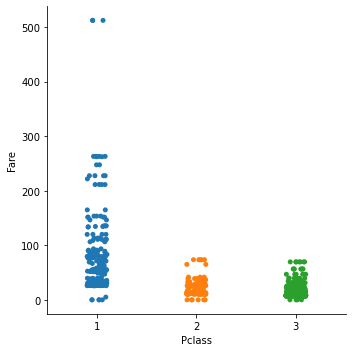

In [31]:
sns.catplot(x='Pclass', y='Fare', data=df_titanic)

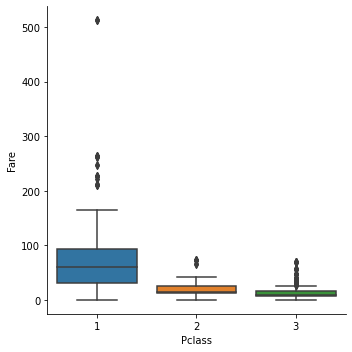

In [33]:
sns.catplot(x='Pclass', y='Fare', data=df_titanic, kind='box')

These are just example plots, many more/different plots are possible. In any case, as expected, first class passengers tend to pay higher fares.